# Lab 2.07 - Univariate Analysis

## Exercise 7 - Australian Athletes (ais)

Import all necessary Python libraries and load the AIS dataset from lab exercise 1.01. Also include the code for setting the index and conversion to categorical variables!

In [2]:
# Package imports for data science
import numpy as np
import pandas as pd
import scipy.stats as stats
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

ais = pd.read_csv('../data/ais.csv').set_index('id')
ais.sex = ais.sex.astype('category')
ais.sport = ais.sport.astype('category')
ais.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
id,,,,,,,,,,,,,
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


Use an appropriate chart type to visualise the following variables. Are several chart types suitable? Make one of each! Note how some graphs nevertheless give a better insight into the data than other types of graphs.

- `sex`
- `sport`
- `ht` (show this also divided by `sex` and by `sport`.)

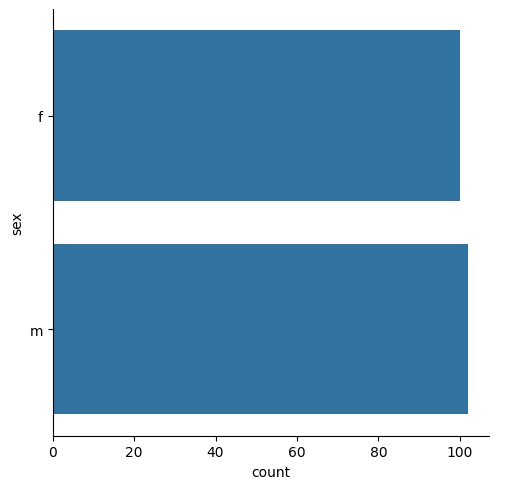

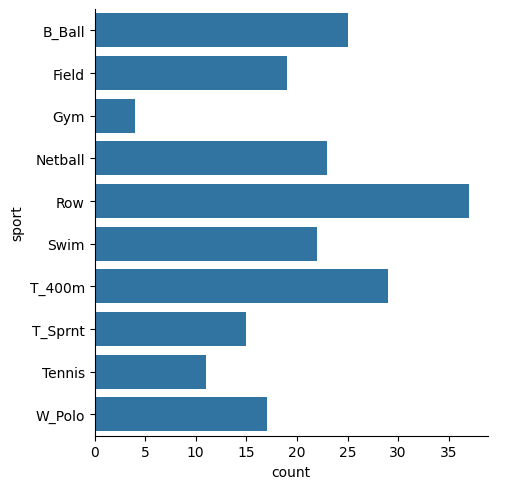

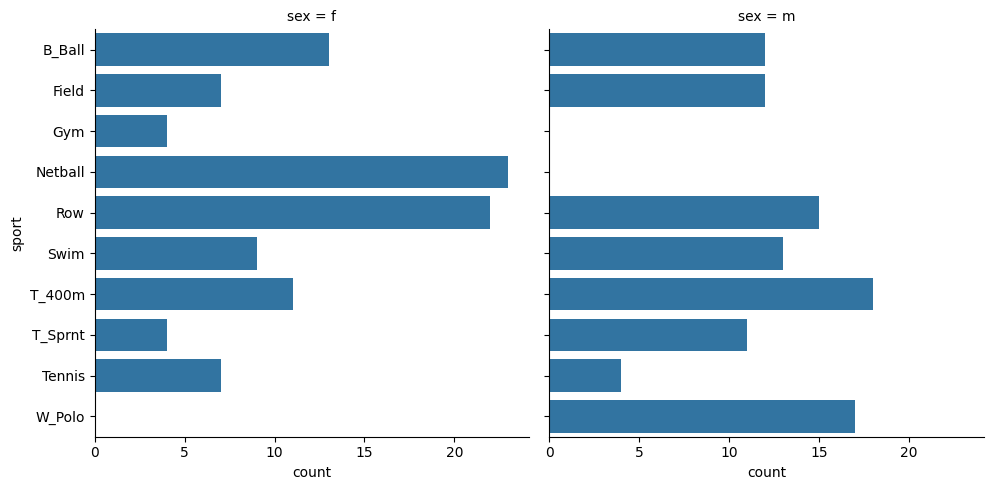

In [18]:
sns.catplot(data=ais, kind='count', y='sex')
sns.catplot(data=ais, kind='count', y='sport')

# sns.catplot(data=ais, kind='count', y='sport', hue="sex")
#OR 
sns.catplot(data = ais, kind = "count",col='sex', y = "sport")

<Axes: xlabel='ht', ylabel='Density'>

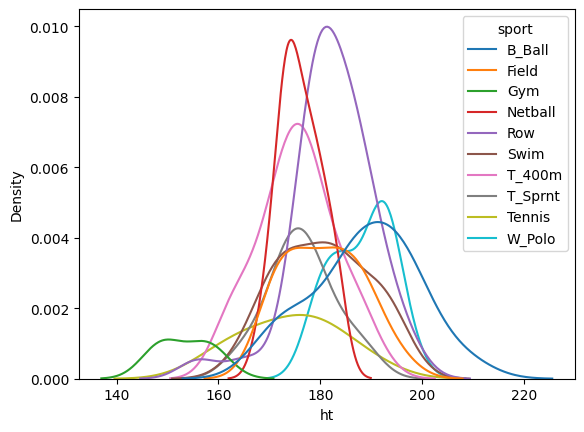

In [19]:
# sns.kdeplot(x = ais['ht'], hue= ais['sex'])
sns.kdeplot(x = ais['ht'], hue= ais['sport'])

Select the following subsets from the dataset and calculate for each the appropriate measures of central tendency (and, when possible, dispersion) of the variables `ht` and `sex`:

1. the rowers
2. the rowers, netball and tennis players together
3. the female basketball players and rowers together

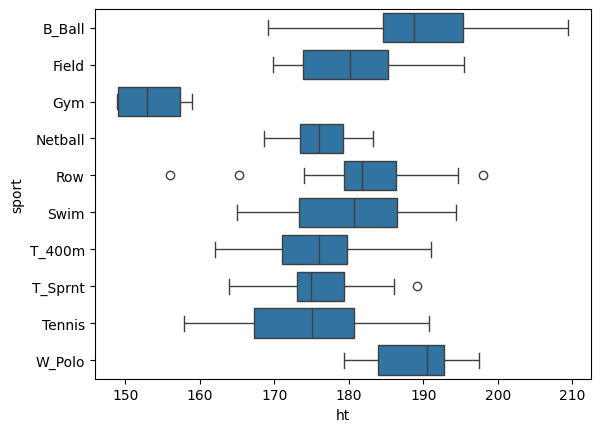

In [14]:
# sns.boxplot(data = ais, x = "ht", y='sex')

sns.boxplot(data = ais, x = "ht", y= ais['sport'])
plt.show()

In [15]:
#1
ais[(ais.sport == 'Row')]['ht'].describe()

count     37.000000
mean     182.375676
std        7.798376
min      156.000000
25%      179.300000
50%      181.800000
75%      186.300000
max      198.000000
Name: ht, dtype: float64

In [16]:
#2
ais[(ais.sport == 'Row') | (ais.sport == 'Tennis') | (ais.sport == 'Netball')]['ht'].describe()

count     71.000000
mean     179.066197
std        7.936371
min      156.000000
25%      174.250000
50%      179.500000
75%      183.400000
max      198.000000
Name: ht, dtype: float64

In [17]:
#3
ais[(ais['sex'] == 'f') & ((ais.sport == 'B_Ball') | (ais.sport == 'Row'))]['ht'].describe()

count     35.000000
mean     180.125714
std        7.144078
min      156.000000
25%      177.400000
50%      179.700000
75%      184.650000
max      195.900000
Name: ht, dtype: float64

## Check your answers

As a check, here are the results of the last question. First the frequencies and mode of the variable `sex`:

|           | Selection 1 | Selection 2 | Selection 3 |
| :-------- | :---------- | :---------- | :---------- |
| **f**     | 22          | 52          | 35          |
| **m**     | 15          | 19          | 0           |
| **mode**  | f           | f           | f           |

Then the relevant measures for central tendency and dispersion for `ht` (max. 3 decimal places):

| Statistic  | Selection 1 | Selection 2 | Selection 3 |
| :--------- | :---------- | :---------- | :---------- |
| mean       | 182.376     | 179.066     | 180.126     |
| stdev      | 7.798       | 7.936       | 7.144       |
| min        | 156         | 156         | 156         |
| Q1         | 179.3       | 174.25      | 177.4       |
| median     | 181.8       | 179.5       | 179.7       |
| Q3         | 186.3       | 183.4       | 184.65      |
| max        | 198         | 198         | 195.9       |
| IQR        | 7           | 9.15        | 7.250       |